# Data Analysis

## Latar Belakang

New York City TLC adalah Badan pemerintahan yang mengawasi dan mengatur lisensi untuk taksi, mobil limusin, serta kendaraan sewa di New York City. Fokus utamanya adalah memastikan bahwa layanan transportasi umum di kota tersebut beroperasi sesuai dengan standar yang ditetapkan, mempromosikan keselamatan, kualitas layanan, dan melindungi konsumen dalam industri transportasi taksi dan limusin di New York City. New York City saat ini bekerja sama dengan Hot97. Hot 97 (WQHT) adalah stasiun radio terkenal di New York City yang dikenal karena fokusnya pada musik hip-hop. Saat ini Hot 97 mempunyai kontrak dengan newyork TLC sebagai
Radio Official Partner sehingga seluruh taxi yang di Newyork untuk menghibur penumpangnya akan memutar dari hot 97.


## Stakeholder <br>
<b>Marketing Team Radio 97 </b><br> 
Marketing Team Radio 97 saat ini mempunyai masalah pada penentuan harga iklan lalu pihak newyork city TLC memberikan solusi dengan memberi dataset trip taxi pada 2023. Sebagai Data Analyst di perusahaan Radio 97, saya diminta Sebagai data Analyst untuk melakukan analisis terhadap data tersebut untuk membantu marketing team dalam menentukan harga iklan yang akan ditawarkan kepada perusahaan lain. Untuk menentukan harga iklan akan dilihat dari jumlah penumpang yang menggunakan taxi pada jam tertentu. <br> Untuk menentukan jam tertentu kita berkaca pada televisi yang mempunyai jam tayang tertentu yang mana pada jam tersebut penonton televisi akan lebih banyak yang disebut dengan prime time. <br> 

## Batasan Masalah <br>
1. Data yang digunakan adalah data trip taxi pada tahun januari 2023
2. Hanya mencari parameter untuk menentukan harga iklan.


## Process <br>
Untuk menentukan prime time pada taksi kita akan melihat dari jumlah penumpang yang menggunakan taxi pada jam tertentu. Dan akan dilakukan analysis sebagai berikut : <br>
1. Analisa proporsi penumpang taxi seluruh New York City pada tahun 2023 berdasarkan kategori waktu<br>
2. Analisa rata rata penumpang taxi berdasarkan hari dan minggu <br>
3. Analisa Trend penumpang taxi berdasarkan rata rata hari dan jam 

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
#hide warnings
import warnings
warnings.filterwarnings('ignore')


In [22]:
df = pd.read_csv('cleaned_data2.csv')

df

,pickup_datetime,dropoff_datetime,PU_hour,PU_time_of_day,PU_day,PU_category_week,PU_week,trip_distance,distance_level,trip_duration,PU_date,PUBorough,PUZone,PUservice_zone,DOBorough,DOZone,DOservice_zone
0,2023-01-01 00:26:10,2023-01-01 00:37:11,0,midnight,sunday,weekend,week_1,2.58,medium_trips,11.02,1,Manhattan,Morningside Heights,Boro Zone,Manhattan,Lincoln Square West,Yellow Zone
1,2023-01-01 00:51:03,2023-01-01 00:57:49,0,midnight,sunday,weekend,week_1,1.81,short_trips,6.77,1,Manhattan,Bloomingdale,Yellow Zone,Manhattan,Central Park,Yellow Zone
2,2023-01-01 00:13:14,2023-01-01 00:19:03,0,midnight,sunday,weekend,week_1,1.30,short_trips,5.82,1,Manhattan,Central Harlem,Boro Zone,Manhattan,Upper West Side North,Yellow Zone
3,2023-01-01 00:33:04,2023-01-01 00:39:02,0,midnight,sunday,weekend,week_1,1.10,short_trips,5.97,1,Manhattan,Central Harlem,Boro Zone,Manhattan,East Harlem North,Boro Zone
4,2023-01-01 00:53:31,2023-01-01 01:11:04,0,midnight,sunday,weekend,week_1,2.78,medium_trips,17.55,1,Manhattan,Central Harlem,Boro Zone,Manhattan,Yorkville East,Yellow Zone
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64045,2023-01-31 21:56:00,2023-01-31 22:14:00,21,evening,tuesday,weekday,week_5,3.92,medium_trips,18.00,31,Manhattan,East Harlem South,Boro Zone,Manhattan,Penn Station/Madison Sq West,Yellow Zone
64046,2023-01-31 22:40:00,2023-01-31 22:48:00,22,evening,tuesday,weekday,week_5,2.14,medium_trips,8.00,31,Queens,Baisley Park,Boro Zone,Queens,Saint Albans,Boro Zone
64047,2023-01-31 23:46:00,2023-02-01 00:02:00,23,evening,tuesday,weekday,week_5,3.44,medium_trips,16.00,31,Brooklyn,DUMBO/Vinegar Hill,Boro Zone,Brooklyn,Bushwick South,Boro Zone
64048,2023-01-31 23:01:00,2023-01-31 23:19:00,23,evening,tuesday,weekday,week_5,3.03,medium_trips,18.00,31,Brooklyn,Stuyvesant Heights,Boro Zone,Brooklyn,Prospect Heights,Boro Zone


### Analisa Proporsi berdasarkan kategori Waktu

In [23]:
# Persebaran berdasarkan borough
fig = px.pie(df, names='PU_time_of_day', hole=0.8)
fig.update_layout(title='Persebaran Proporsi Taksi Berdasarkan Kategori Waktu', title_x=0.5)
#show proportion of each borough
fig.update_traces(textposition='outside', textinfo='percent+label')

#hide legend
fig.update_layout(showlegend=False, width=800, height=500)

#break down by Staten Island

fig.show()


<B> Interprestasi</b> : <BR>
Setelah kita ketahui proporsi perjalanan paling besar pada siang hari lalu diikuti malam hari dan dini hari untuk mengetahui lebih dalam mengenai waktu waktu mana saja yang dimana consumen melakukan banyak perjalanan disetiap kategorinya mari kita analisa lebih lanjut untuk mengetahui waktu waktu konsumen sedang naik taxi sehingga bisa kita jadikan acuan untuk menenmukan waktu.



### Analisa rata rata jumlah pick up perhari berdasakan hari dan minggu

In [24]:
week_trips = df.groupby('PU_week')['pickup_datetime'].count().reset_index().rename(columns= {'pu_week':'week',
'pickup_datetime':'number of trips'})
week_trips


,PU_week,number of trips
0,week_1,13737
1,week_2,14746
2,week_3,14322
3,week_4,15398
4,week_5,5847


In [25]:
mean_pickups = {}
PU_day = ['monday', 'tuesday', 'wednesday', 'thursday', 'friday', 'saturday', 'sunday']

for day in PU_day:
    mean_pickups[day] = round(df[df['PU_day'] == day].groupby('PU_week')['pickup_datetime'].count().mean())

#mean_pickups to dataframe
mean_pickups_df = pd.DataFrame(list(mean_pickups.items()), columns=['day', 'mean_pickups'])
mean_pickups_df


,day,mean_pickups
0,monday,1876
1,tuesday,2114
2,wednesday,2318
3,thursday,2399
4,friday,2357
5,saturday,1999
6,sunday,1562


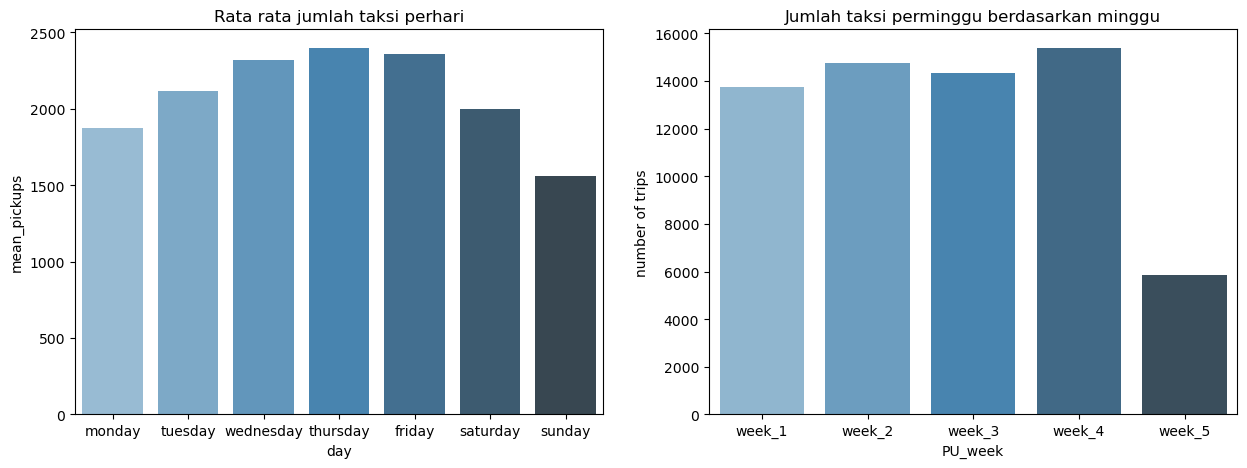

In [62]:
#use seaborn to plot mean pickups and number of trips per week use subplots
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.barplot(x='day', y='mean_pickups', data=mean_pickups_df, ax=ax[0], palette='Blues_d')
sns.barplot(x='PU_week', y='number of trips', data=week_trips, ax=ax[1], palette='Blues_d')
ax[0].set_title('Rata rata jumlah taksi perhari')
ax[1].set_title('Jumlah taksi perminggu berdasarkan minggu') 
plt.show()


<b> Interpretasi </b> <br>
- Taksi umumnya beroperasi pada hari kerja. Selasa memiliki jumlah perjalanan tertinggi. Jumlah perjalanan selama akhir pekan lebih rendah. Ini kemungkinan disebabkan karena orang-orang di New York City (NYC), dan umumnya, cenderung memiliki lebih sedikit kegiatan terkait pekerjaan, yang mengakibatkan penurunan penggunaan taksi.

- Minggu ke-5 memiliki jumlah perjalanan yang paling rendah karena pada bulan Januari, minggu ke-5 hanya terdiri dari 3 hari, dibandingkan dengan minggu penuh pada minggu-minggu lainnya.








In [27]:
hour_trips = df.groupby('PU_hour')['pickup_datetime'].count().reset_index().rename(columns= {'PU_hour':'hour',
'pickup_datetime':'number of trips'})
hour_trips


,hour,number of trips
0,0,1040
1,1,815
2,2,589
3,3,514
4,4,390
5,5,373
6,6,907
7,7,2478
8,8,3023
9,9,3306


In [28]:
#time series plot
fig = px.line(hour_trips, x='hour', y='number of trips', title='Jumlah pickup taksi per jam')
fig.update_layout(xaxis_title='Hour', yaxis_title='Number of trips')
#xticks
fig.update_xaxes(nticks=24)
fig.show()

<b> Intrepertasi </b> <br>
Pada jam 00.00 - 05.00 perjalanan menurun drastis. Ini kemungkinan disebabkan oleh kurangnya aktivitas di malam hari walau pada malam hari masih ada aktivitas seperti clubbing, dll. Namun, pada jam 05.00 - 06.00 perjalanan mulai meningkat. Ini kemungkinan disebabkan oleh orang-orang yang berangkat ke tempat kerja atau sekolah. Pada jam 06.00 - 09.00 perjalanan mencapai puncaknya. Ini kemungkinan disebabkan oleh orang-orang yang berangkat ke tempat kerja atau sekolah. Pada jam 09.00 - 15.00 perjalanan menurun drastis. Ini kemungkinan disebabkan oleh kurangnya aktivitas di siang hari. Namun, pada jam 15.00 - 16.00 perjalanan mulai meningkat. Ini kemungkinan disebabkan oleh orang-orang yang pulang dari tempat kerja atau sekolah. Pada jam 16.00 - 20.00 perjalanan mencapai puncaknya. Ini kemungkinan disebabkan oleh orang-orang yang pulang dari tempat kerja atau sekolah. Pada jam 20.00 - 00.00 perjalanan menurun drastis. Ini kemungkinan disebabkan oleh kurangnya aktivitas di malam hari walau pada malam hari masih ada aktivitas seperti clubbing, dll. Data ini sangat dibutuhkan untuk menentukan prime time pada taksi. <br>


### Analisa berdasarkan kategori waktu 

In [51]:
days_of_week = ['monday', 'tuesday', 'wednesday', 'thursday', 'friday', 'saturday', 'sunday']
df_weekdays = df[df['PU_day'].isin(days_of_week)]
df_days_df_weekdays = {}
for i in days_of_week:
    df_day = df_weekdays[df_weekdays['PU_day'] == i]
    df_grouped = df_day.groupby(['PU_hour', 'PU_week',  'PU_time_of_day',])['pickup_datetime'].count().reset_index()
    df_days_df_weekdays[i] = df_grouped.rename(columns={'PU_hour': 'hour', 'pickup_datetime': 'number of trips'})
    
df_days_df_weekdays_df = pd.concat(df_days_df_weekdays, axis=0).reset_index().drop('level_1', axis=1)
df_days_df_weekdays_df.rename(columns={'level_0': 'PU_day'}, inplace=True)
df_days_df_weekdays_df

,PU_day,hour,PU_week,PU_time_of_day,number of trips
0,monday,0,week_1,midnight,14
1,monday,0,week_2,midnight,14
2,monday,0,week_3,midnight,35
3,monday,0,week_4,midnight,25
4,monday,0,week_5,midnight,29
...,...,...,...,...,...
739,sunday,23,week_1,evening,27
740,sunday,23,week_2,evening,25
741,sunday,23,week_3,evening,47
742,sunday,23,week_4,evening,36


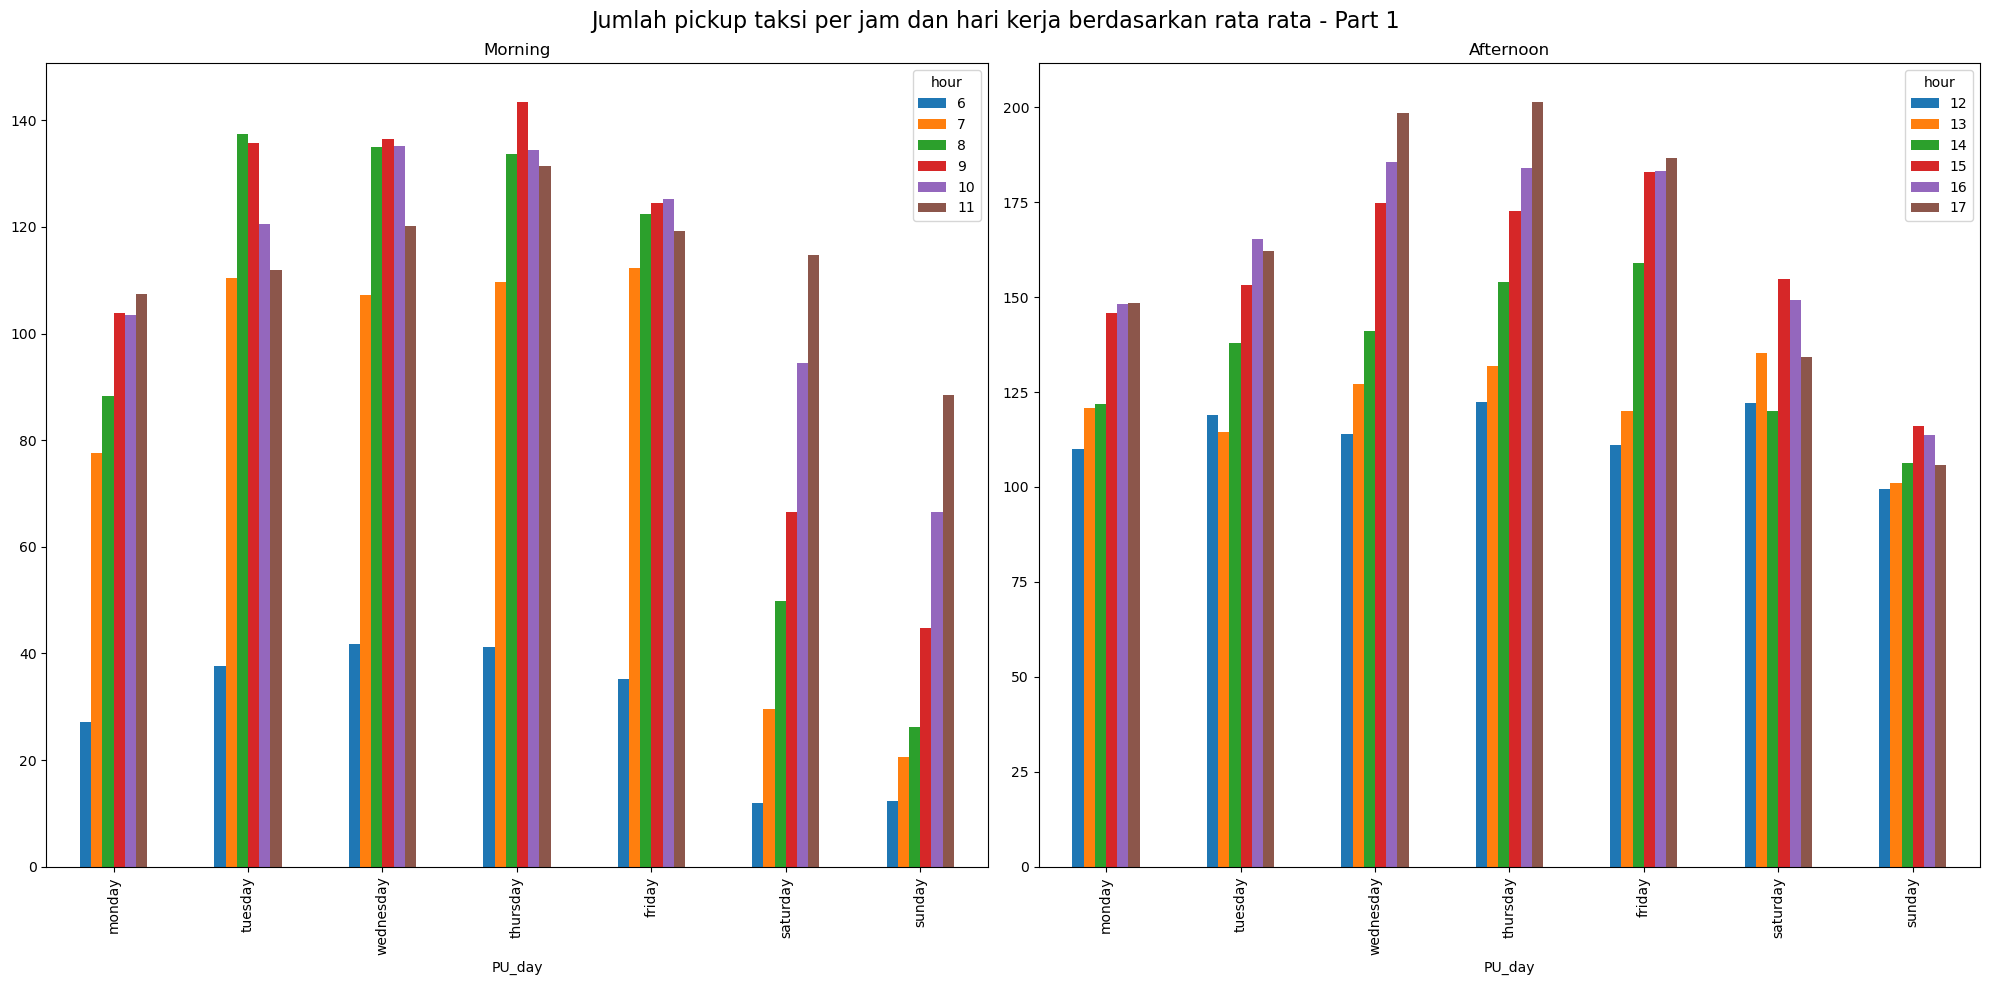

In [69]:

# Assuming you have defined 'days_of_week' and 'df_days_df_weekdays_df'

# Create the first figure with two subplots for Morning and Afternoon
fig1, axes1 = plt.subplots(1, 2, figsize=(20, 10))

# Morning
morning_df = df_days_df_weekdays_df[df_days_df_weekdays_df['PU_time_of_day'] == 'morning']
morning_df_pivot = morning_df.pivot_table(index='PU_day', columns='hour', values='number of trips', aggfunc='mean').reindex(days_of_week)
morning_df_pivot.plot(kind='bar', ax=axes1[0])
axes1[0].set_title('Morning')

# Afternoon
afternoon_df = df_days_df_weekdays_df[df_days_df_weekdays_df['PU_time_of_day'] == 'afternoon']
afternoon_df_pivot = afternoon_df.pivot_table(index='PU_day', columns='hour', values='number of trips', aggfunc='mean').reindex(days_of_week)
afternoon_df_pivot.plot(kind='bar', ax=axes1[1])
axes1[1].set_title('Afternoon')

fig1.suptitle('Jumlah pickup taksi per jam dan hari kerja berdasarkan rata rata - Part 1', fontsize=16)
plt.tight_layout()
plt.show()


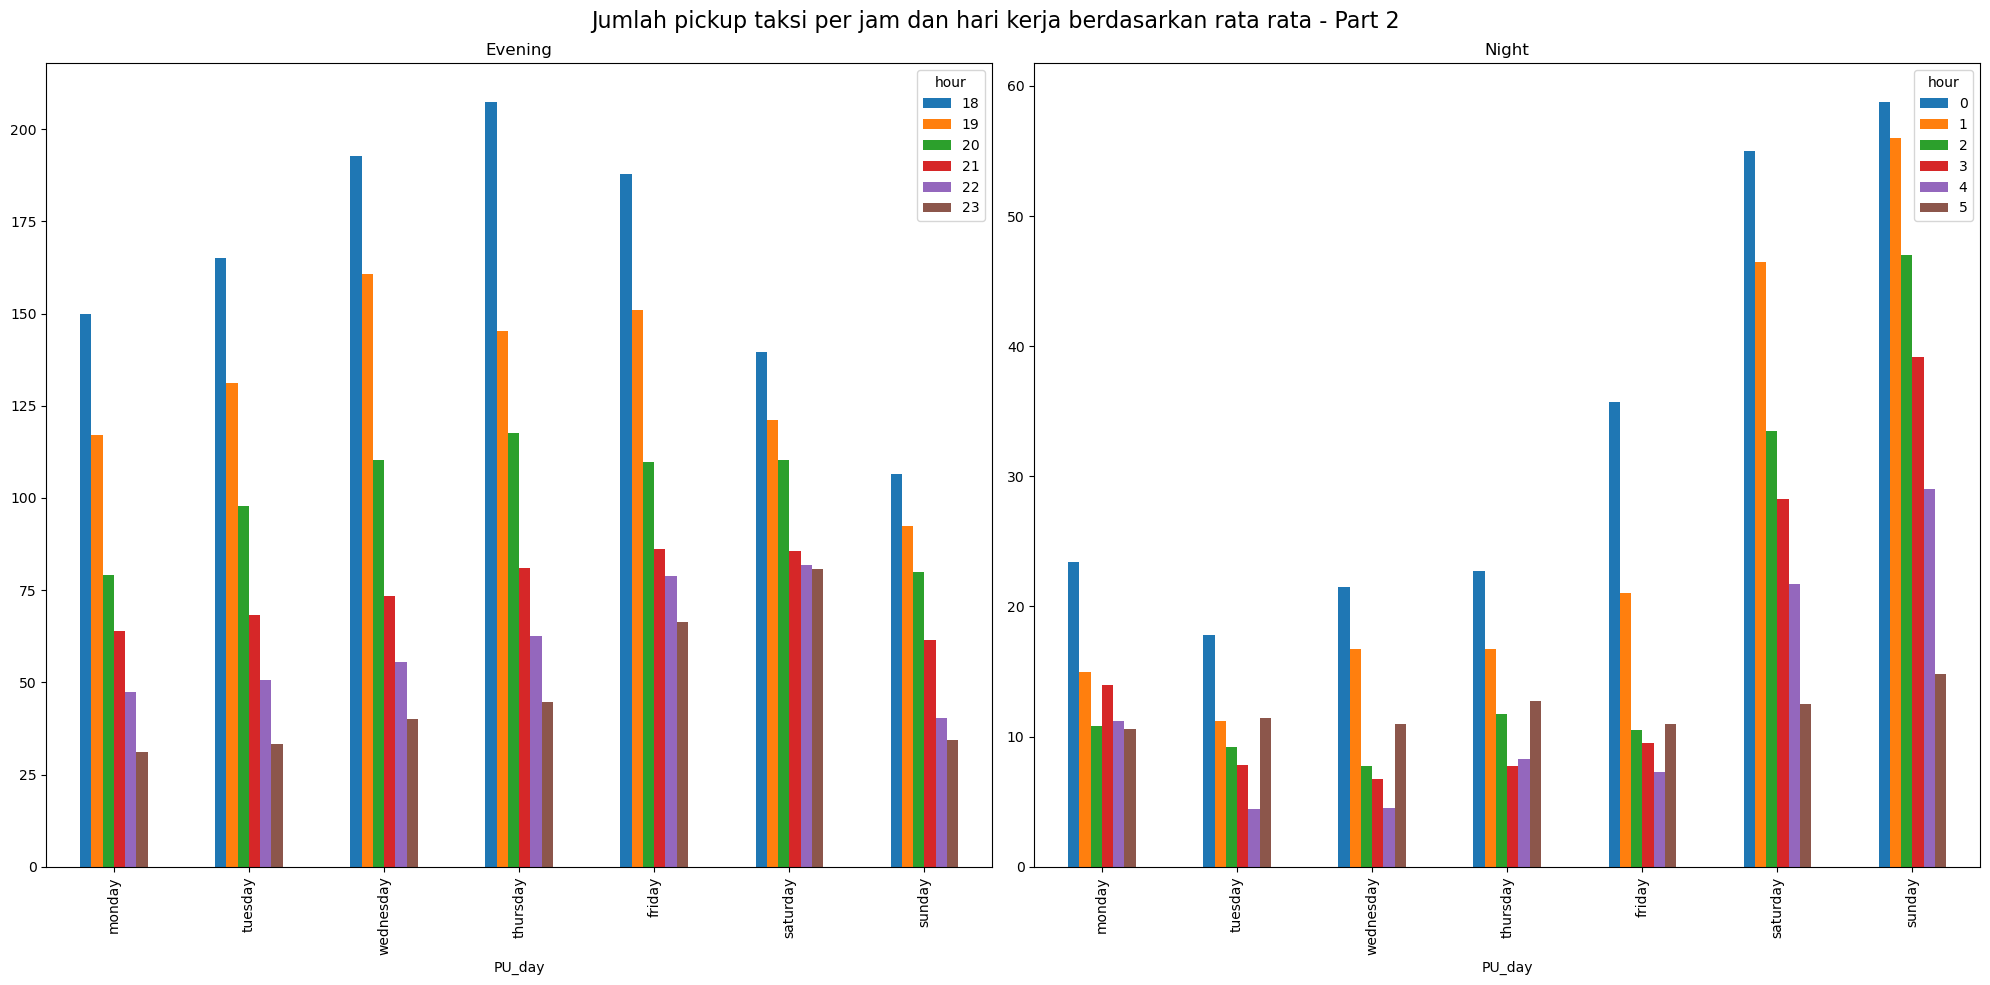

In [70]:
# Create the second figure with two subplots for Evening and Night
fig2, axes2 = plt.subplots(1, 2, figsize=(20, 10))

# Evening
evening_df = df_days_df_weekdays_df[df_days_df_weekdays_df['PU_time_of_day'] == 'evening']
evening_df_pivot = evening_df.pivot_table(index='PU_day', columns='hour', values='number of trips', aggfunc='mean').reindex(days_of_week)
evening_df_pivot.plot(kind='bar', ax=axes2[0])
axes2[0].set_title('Evening')

# Night
night_df = df_days_df_weekdays_df[df_days_df_weekdays_df['PU_time_of_day'] == 'midnight']
night_df_pivot = night_df.pivot_table(index='PU_day', columns='hour', values='number of trips', aggfunc='mean').reindex(days_of_week)
night_df_pivot.plot(kind='bar', ax=axes2[1])
axes2[1].set_title('Night')

fig2.suptitle('Jumlah pickup taksi per jam dan hari kerja berdasarkan rata rata - Part 2', fontsize=16)
plt.tight_layout()
plt.show()


<b> Interpretasi </b> <br>
 Mencari waktu waktu dimana penumpang taxi paling banyak sehingga bisa kita jadikan acuan untuk menentukan prime time atau Rush Hour pada taksi. <br>
Pada week day yaitu hari senin sampai jumat perjalanan  morning rush hour terjadi pada 07.00 - 11.00 lalu pada afternoon terjadi pada 15.00 - 17.00 dan evening terjadi pada 18.00, mid night proporsi perjalanan terbanyak ada pada jam 00.00. Saat weekend yaitu hari sabtu dan minggu morning rush hour terjadi pada 11.00 - 12.00 lalu pada afternoon terjadi pada 15.00 - 17.00 dan evening terjadi pada 18.00, mid night proporsi perjalanan terbanyak ada pada jam 00.00 - 03.00. <br>

## Kesimpulan
- Penggunaan taksi di NYC paling tinggi pada hari kerja, terutama pada hari Selasa. Ini kemungkinan disebabkan oleh orang-orang yang pergi ke tempat kerja atau sekolah.
- Jumlah yang saat akhir pekan lebih rendah. Ini kemungkinan disebabkan oleh orang-orang di NYC, dan umumnya, cenderung memiliki lebih sedikit kegiatan terkait pekerjaan, yang mengakibatkan penurunan penggunaan taksi.
- Pada Pukul 16.00 - 20.00 perjalanan mencapai puncaknya. Dikarenakan banyak orang yang pulang dari tempat kerja atau sekolah. 
- Morning rushhour terjadi pada weekdays saja yaitu pada jam 07.00 - 11.00
- Pada weekend perjalanan malam sangat tinggi yaitu pada jam 00.00 - 03.00


## Rekomendasi 
- Berdasarkan https://fitsmallbusiness.com/radio-advertising-costs/ harga iklan di newyork City per 30 detik adalah 1405$ dengan pembagian waktu yang sudah ditentukan contoh study kasus : pada  jam 07.00 - 11.00 week day maka harga iklan per 30 detik adalah 1405$ dikarenakan pada jam tersebut merupakan morning rush hour.
- Data yang digunakan lebih baik jika lebih dari 1 bulan karena data yang digunakan hanya 1 bulan sehingga tidak bisa menentukan trend perjalanan taxi secara keseluruhan.